In [9]:
%run documentacao/2_funcoes.ipynb

In [10]:
df_covid = pd.read_csv('documentacao/dataset/Planilha COVID19 - Aparecida 2021_02112021.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (1,9,14,47,48,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
#quantidade de casos notificados por dia
#quantidade de leitos ocupados na uti
#quantidade de leitos ocupados na enfermaria
#quantas pessoas voltaram para UTI

In [122]:
def escolhe_ano_mes(ano, meses, df): 
    '''
        Visualiza quantidade de casos por mês em um ano escolhido

        Retorna o Dataframe ordenado pelas datas
    '''
    filtro = pd.DataFrame()
    diaria = []
    for m in range(0,len(meses)):
        if(len(meses[m]) == 1): 
            meses[m] = '0'+ meses[m]      
    meses.sort()
    ano = sorted(ano)
    for a in ano:
        for m in meses:
            if(len(m) == 1):
                m = '0' + m
            filtro = df[df['Data da Notificação:'].str.startswith(f'{a}-{m}')]
            for dia in range(1,32):
                filtro1 = filtro[(filtro['Data da Notificação:'].str.startswith(f'{a}-{m}-{dia}')) | (filtro['Data da Notificação:'].str.startswith(f'{a}-{m}-0{dia}'))]
                if(len(filtro1) > 0):
                    diaria.append([f'{a}-{m}-{dia}', len(filtro1)])
 
    df_ano_mes = pd.DataFrame(diaria, columns=['Periodo', 'Contagem'])
    # df_ano_mes.sort_values(by='Periodo') #ordena de acordo com o dia do mês e mês
    
    return df_ano_mes

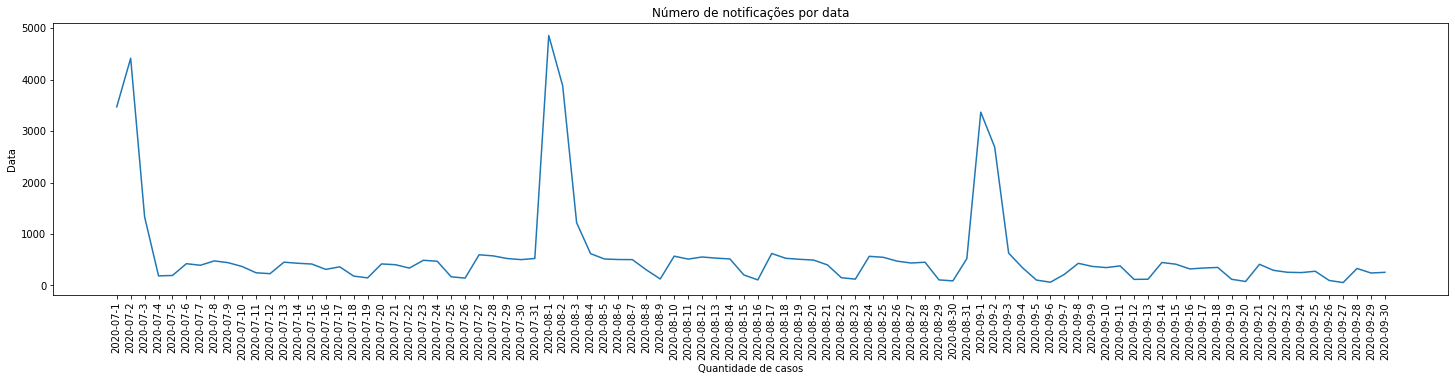

In [131]:
#tamanho do gráfico
plt.figure(figsize=(25,5)) 

#nome do eixo x e y, respectivamente
plt.xlabel('Quantidade de casos')
plt.ylabel('Data')

#rotacionar as datas
plt.xticks(rotation = 90) 

#seleciona meses e o ano
lista_meses = ['7', '8', '9'] #coloque preferenciamente em sequência
df_visualiza = escolhe_ano_mes(['2020'], lista_meses , df_covid)

#Valores únicos da coluna e conta quantas ocorrências tem
valores_x = (df_visualiza) 
plt.plot(df_visualiza['Periodo'], df_visualiza['Contagem'])

# Título do gráfico
plt.title('Número de notificações por data')

#Mostra o gráfico
plt.show()

In [ ]:
df_covid['Data da Notificação:'].min()

'2020-02-18'

In [ ]:
df_covid['Data da Notificação:'].max()

'2021-10-28'

In [127]:
df_covid[df_covid['Data da Notificação:'] == '2020-04-12']

,Unnamed: 0,Notificações ESUS - SIVEP,Sexo,Unidade Notificadora,Data de Nascimento,IdadeM,Outra Faixa etária,Raça/Cor,Bairro,CCI,...,Data do Diagnóstico,Data de Lançamento,Data da cura ou óbito,"Ja vacinou? Se sim, Qual Vacina?",Data 1° Dose,Data 2° Dose,"Fez sequenciamento? Se Sim, qual variante?",Tipo de Teste / Método,Laboratório,Observação
